In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA


In [12]:
df = pd.read_csv("Zoo.csv")
print("First 5 Rows of Dataset:")
print(df.head())


First 5 Rows of Dataset:
  animal name  hair  feathers  eggs  milk  airborne  aquatic  predator  \
0    aardvark     1         0     0     1         0        0         1   
1    antelope     1         0     0     1         0        0         0   
2        bass     0         0     1     0         0        1         1   
3        bear     1         0     0     1         0        0         1   
4        boar     1         0     0     1         0        0         1   

   toothed  backbone  breathes  venomous  fins  legs  tail  domestic  catsize  \
0        1         1         1         0     0     4     0         0        1   
1        1         1         1         0     0     4     1         0        1   
2        1         1         0         0     1     0     1         0        0   
3        1         1         1         0     0     4     0         0        1   
4        1         1         1         0     0     4     1         0        1   

   type  
0     1  
1     1  
2     4  
3  

In [13]:
print("\n Dataset Info:")
print(df.info())

print("\n Summary Statistics:")
print(df.describe())



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None

 

<ipython-input-14-193adbb31a14>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['type'], palette='coolwarm')


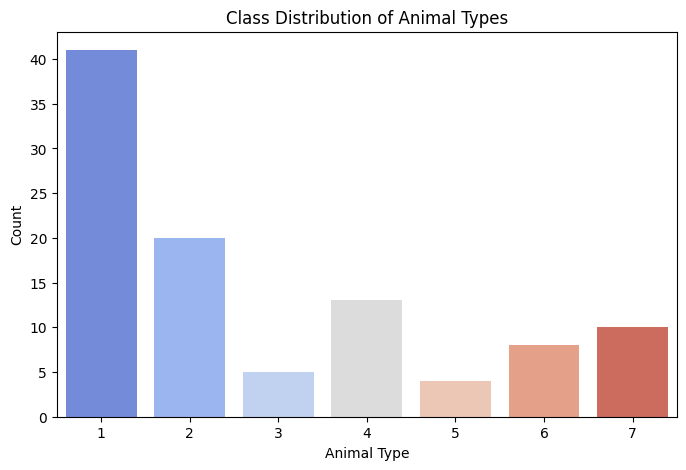

In [14]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['type'], palette='coolwarm')
plt.title("Class Distribution of Animal Types")
plt.xlabel("Animal Type")
plt.ylabel("Count")
plt.show()


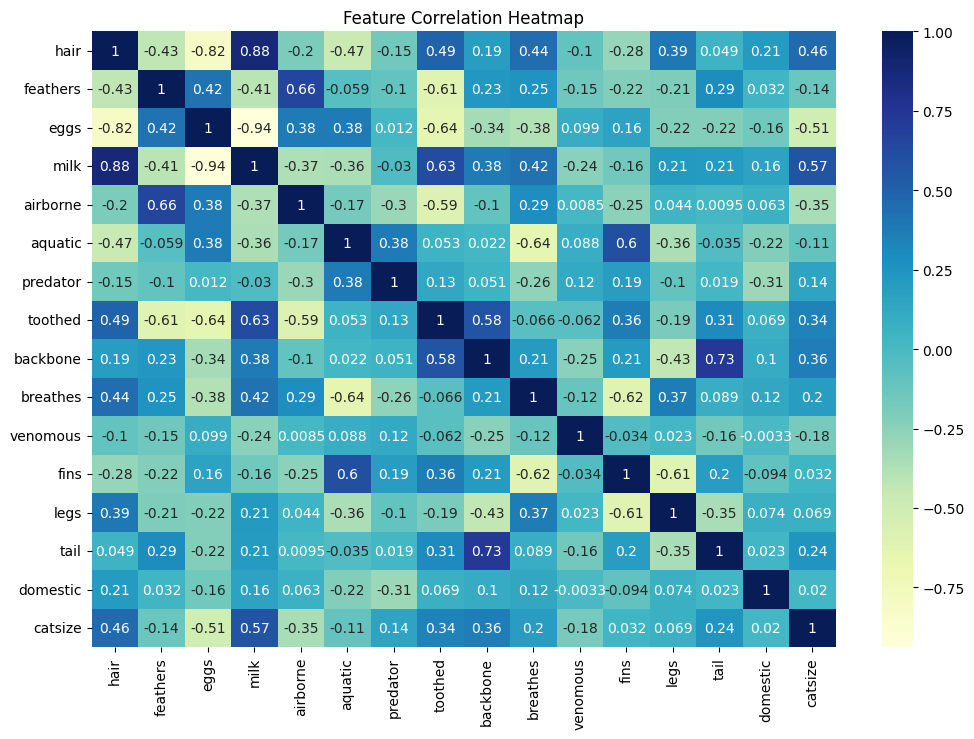

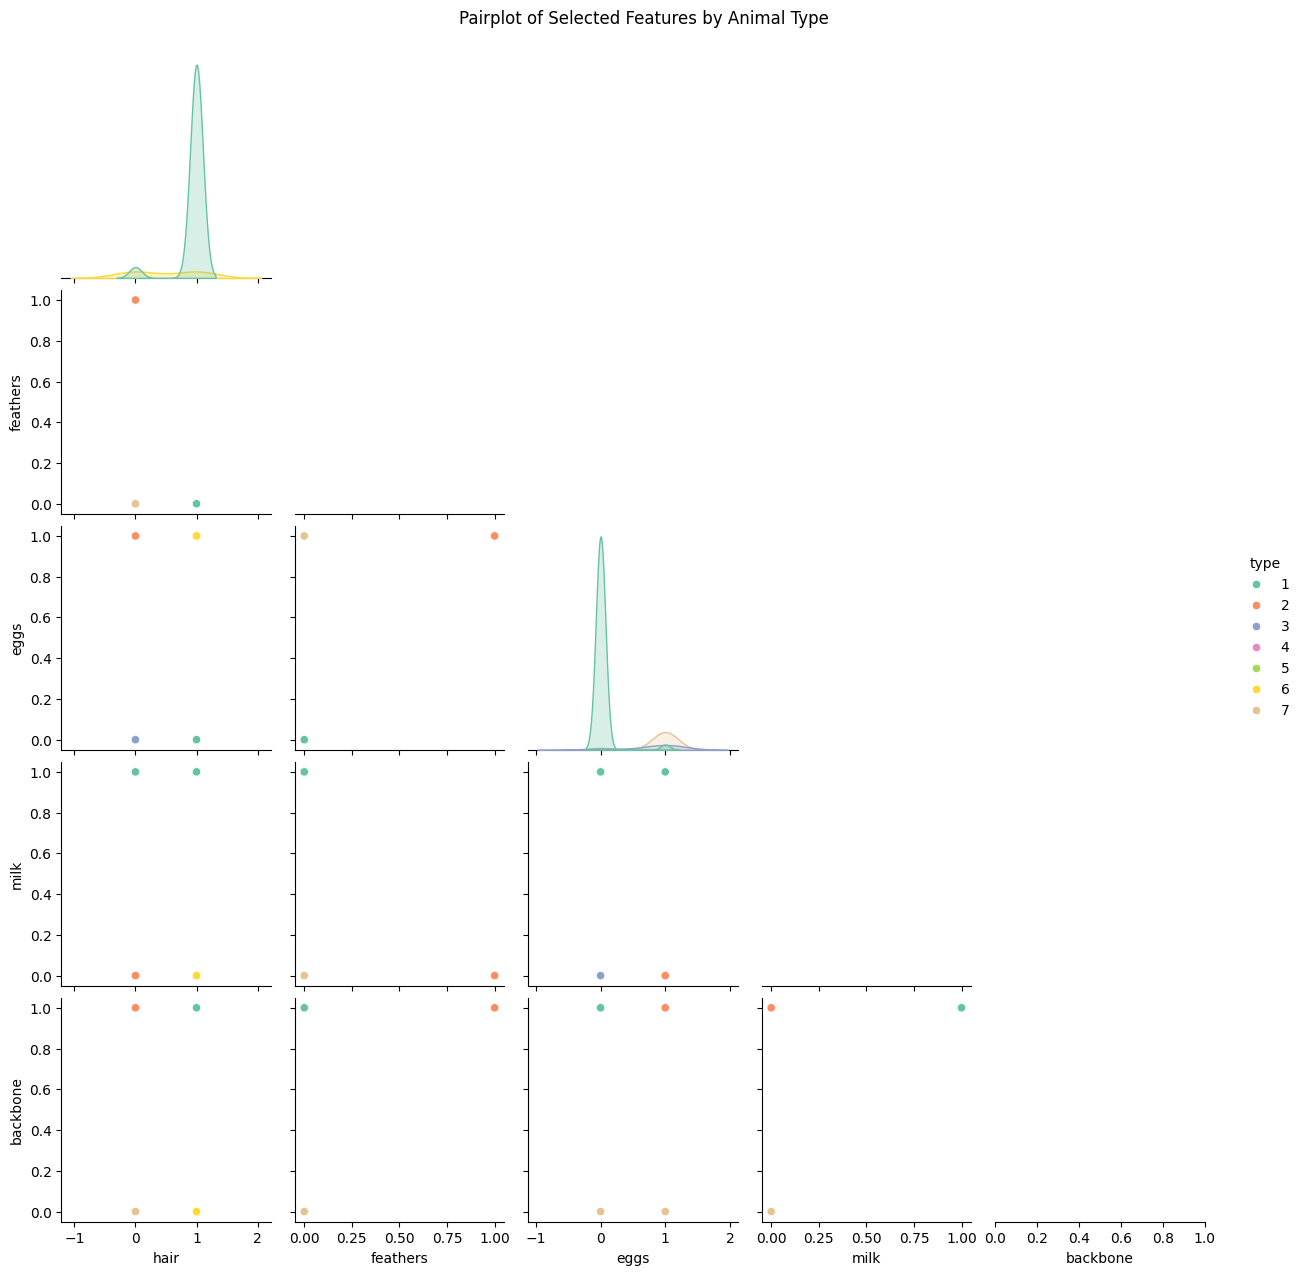

<ipython-input-15-8651eb62b348>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data=df, palette='pastel')
<ipython-input-15-8651eb62b348>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data=df, palette='pastel')
<ipython-input-15-8651eb62b348>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y=col, data=df, palette='pastel')
<ipython-input-15-8651eb62b348>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `

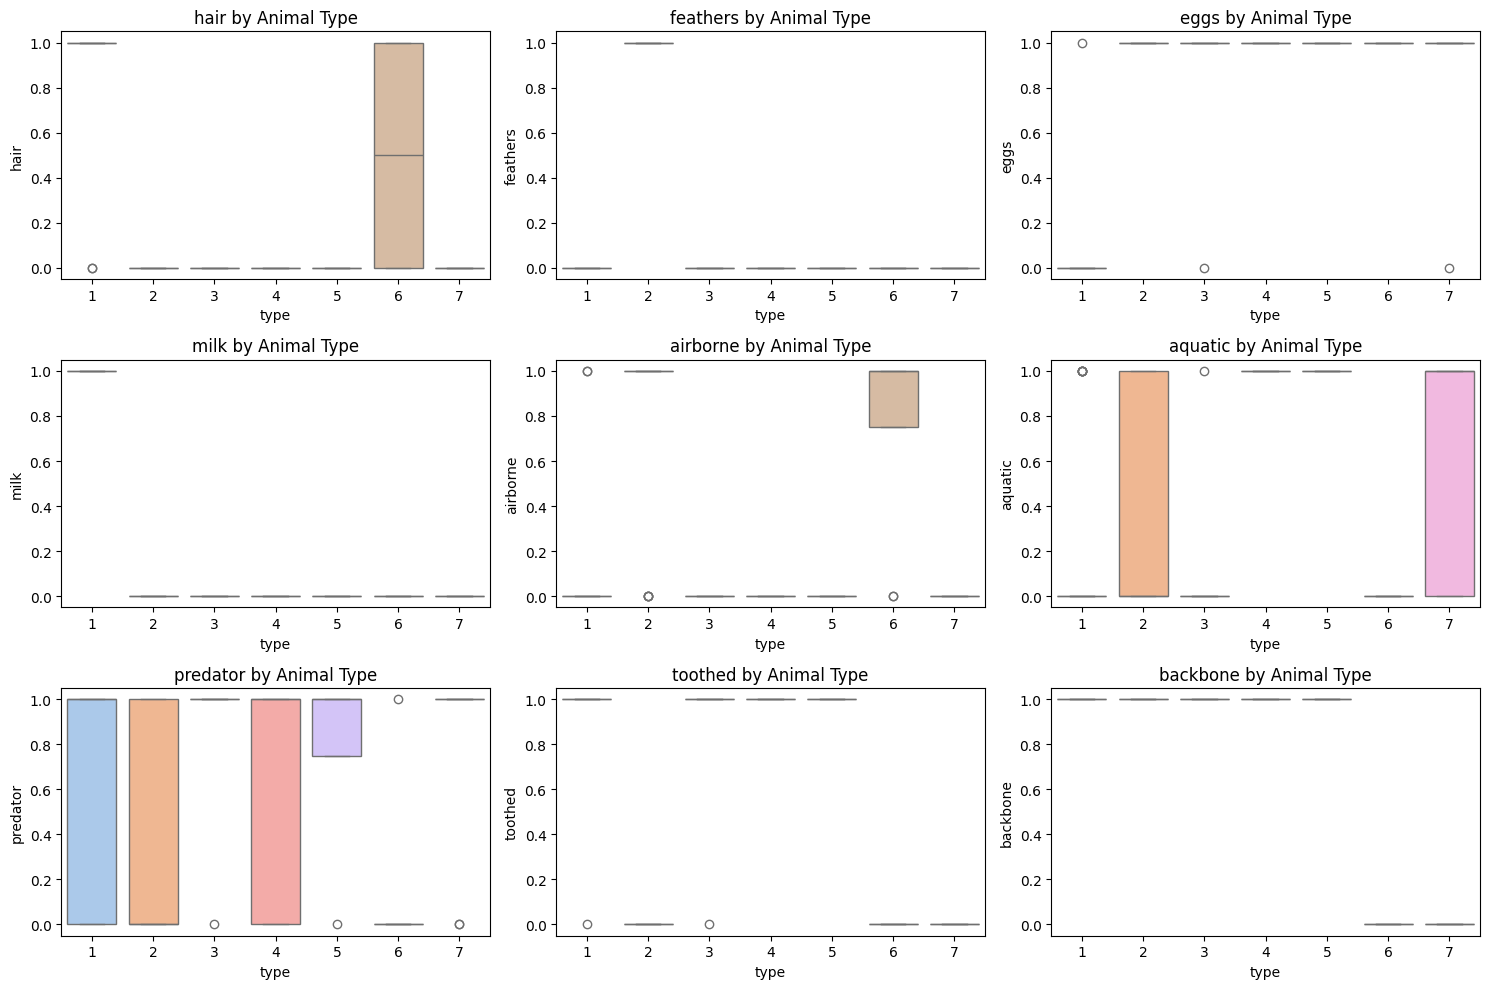

<ipython-input-15-8651eb62b348>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='type', y='legs', data=df, palette='muted')


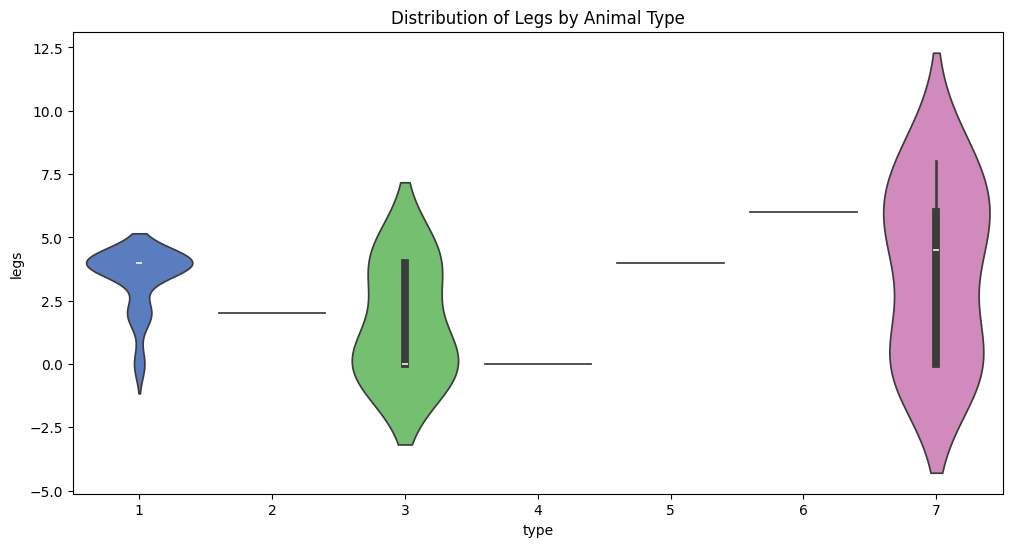

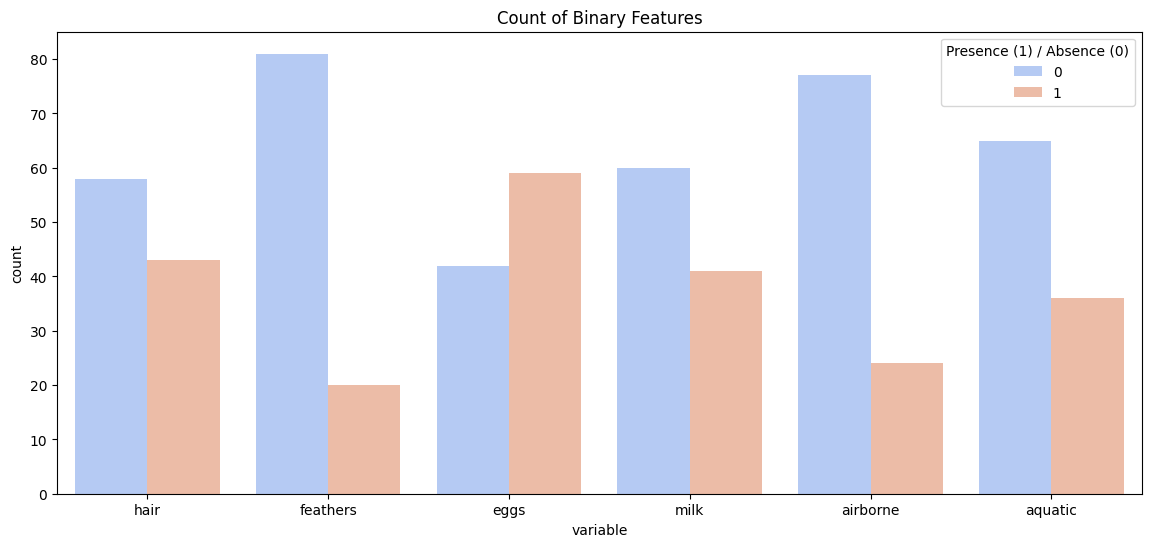

In [15]:
# Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['animal name', 'type']).corr(), annot=True, cmap='YlGnBu')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot
selected_features = ['hair', 'feathers', 'eggs', 'milk', 'backbone', 'type']
sns.pairplot(df[selected_features], hue='type', palette='Set2', corner=True)
plt.suptitle("Pairplot of Selected Features by Animal Type", y=1.02)
plt.show()

# Boxplots
num_features = df.select_dtypes(include=np.number).columns.tolist()
num_features.remove('type')
plt.figure(figsize=(15, 10))
for i, col in enumerate(num_features[:9], 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='type', y=col, data=df, palette='pastel')
    plt.title(f'{col} by Animal Type')
plt.tight_layout()
plt.show()

# Violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(x='type', y='legs', data=df, palette='muted')
plt.title("Distribution of Legs by Animal Type")
plt.show()

# Countplot for binary features
binary_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic']
df_melted = df.melt(id_vars='type', value_vars=binary_features)
plt.figure(figsize=(14, 6))
sns.countplot(x='variable', hue='value', data=df_melted, palette='coolwarm')
plt.title("Count of Binary Features")
plt.legend(title='Presence (1) / Absence (0)')
plt.show()


In [16]:
print("\n Missing Values in Dataset:")
print(df.isnull().sum())

def detect_outliers(df):
    outlier_columns = []
    for col in df.select_dtypes(include=np.number).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        if ((df[col] < lower_bound) | (df[col] > upper_bound)).sum() > 0:
            outlier_columns.append(col)
    return outlier_columns

outlier_cols = detect_outliers(df)
print("\n Columns with Outliers:", outlier_cols)

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])



 Missing Values in Dataset:
animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

 Columns with Outliers: ['feathers', 'airborne', 'backbone', 'breathes', 'venomous', 'fins', 'legs', 'domestic']


In [17]:
df.drop(columns=['animal name'], inplace=True)

X = df.drop(columns=['type'])
y = df['type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [18]:
param_grid = {'n_neighbors': range(1, 21)}
grid_search = GridSearchCV(KNeighborsClassifier(metric='euclidean'), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

best_k = grid_search.best_params_['n_neighbors']
print("\n Best K value found:", best_k)

knn = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



 Best K value found: 1


In [19]:
print("\n Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred, average='weighted'))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



 Model Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Confusion Matrix:
 [[8 0 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 1 0 0 0 0]
 [0 0 0 3 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 2 0]
 [0 0 0 0 0 0 2]]

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         3
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



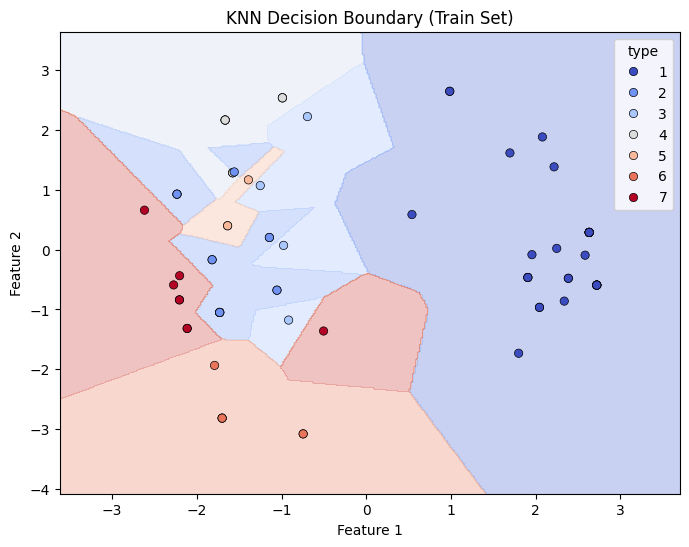

In [20]:
def plot_decision_boundary(X, y, model, title="Decision Boundary"):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette='coolwarm', edgecolor='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

knn_pca = KNeighborsClassifier(n_neighbors=best_k, metric='euclidean')
knn_pca.fit(X_train_pca, y_train)

plot_decision_boundary(X_train_pca, y_train, knn_pca, "KNN Decision Boundary (Train Set)")


In [22]:
print("\n Interview Questions & Answers:")

print("\n 1. What are the key hyperparameters in KNN?")
print("  - `n_neighbors (K)`: Number of nearest neighbors to consider.")
print("  - `metric`: Distance metric (e.g., Euclidean, Manhattan, Minkowski).")
print("  - `weights`: How neighbors contribute (uniform or distance-based).")

print("\n 2. What distance metrics can be used in KNN?")
print("  - Euclidean Distance (default)")
print("  - Manhattan Distance")
print("  - Minkowski Distance")
print("  - Hamming Distance (for categorical data)")



 Interview Questions & Answers:

 1. What are the key hyperparameters in KNN?
  - `n_neighbors (K)`: Number of nearest neighbors to consider.
  - `metric`: Distance metric (e.g., Euclidean, Manhattan, Minkowski).
  - `weights`: How neighbors contribute (uniform or distance-based).

 2. What distance metrics can be used in KNN?
  - Euclidean Distance (default)
  - Manhattan Distance
  - Minkowski Distance
  - Hamming Distance (for categorical data)
